In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("20110810_preprocessing.txt")

In [3]:
df_continue = df[["StartTime","Dur","TotPkts","TotBytes","SrcBytes","label"]]

In [4]:
df_continue.describe()

,StartTime,Dur,TotPkts,TotBytes,SrcBytes,label
count,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06
mean,4.600411e+04,4.322060e+02,2.547990e+01,1.929134e+04,4.155290e+03,1.450134e-02
std,6.525920e+03,9.958423e+02,3.124788e+03,3.212186e+06,1.858530e+06,1.195452e-01
min,3.521305e+04,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
25%,4.012405e+04,3.130000e-04,2.000000e+00,2.140000e+02,7.800000e+01,0.000000e+00
50%,4.620855e+04,1.194000e-03,2.000000e+00,2.610000e+02,8.300000e+01,0.000000e+00
75%,5.154495e+04,9.012607e+00,4.000000e+00,5.880000e+02,2.610000e+02,0.000000e+00
max,5.724737e+04,3.600031e+03,2.686731e+06,2.689640e+09,2.635366e+09,1.000000e+00


> 消除離群值???

In [5]:
df_continue["Dur_log"] = np.log(df_continue.Dur + 1e-6)
df_continue["TotPkts_log"] = np.log(df_continue.TotPkts + 1e-6)
df_continue["TotBytes_log"] = np.log(df_continue.TotBytes + 1e-6)
df_continue["SrcBytes_log"] = np.log(df_continue.SrcBytes + 1e-6)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [6]:
df_continue.describe()

,StartTime,Dur,TotPkts,TotBytes,SrcBytes,label,Dur_log,TotPkts_log,TotBytes_log,SrcBytes_log
count,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06,2.824636e+06
mean,4.600411e+04,4.322060e+02,2.547990e+01,1.929134e+04,4.155290e+03,1.450134e-02,-3.056697e+00,1.239403e+00,6.055195e+00,5.076170e+00
std,6.525920e+03,9.958423e+02,3.124788e+03,3.212186e+06,1.858530e+06,1.195452e-01,6.343620e+00,9.809967e-01,1.346020e+00,1.658145e+00
min,3.521305e+04,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,-1.381551e+01,9.999995e-07,4.094345e+00,-1.381551e+01
25%,4.012405e+04,3.130000e-04,2.000000e+00,2.140000e+02,7.800000e+01,0.000000e+00,-8.066118e+00,6.931477e-01,5.365976e+00,4.356709e+00
50%,4.620855e+04,1.194000e-03,2.000000e+00,2.610000e+02,8.300000e+01,0.000000e+00,-6.729609e+00,6.931477e-01,5.564520e+00,4.418841e+00
75%,5.154495e+04,9.012607e+00,4.000000e+00,5.880000e+02,2.610000e+02,0.000000e+00,2.198624e+00,1.386295e+00,6.376727e+00,5.564520e+00
max,5.724737e+04,3.600031e+03,2.686731e+06,2.689640e+09,2.635366e+09,1.000000e+00,8.188698e+00,1.480384e+01,2.171267e+01,2.169229e+01


In [7]:
print (df_continue.shape)
print (df_continue.label.value_counts())

(2824636, 10)
0    2783675
1      40961
Name: label, dtype: int64


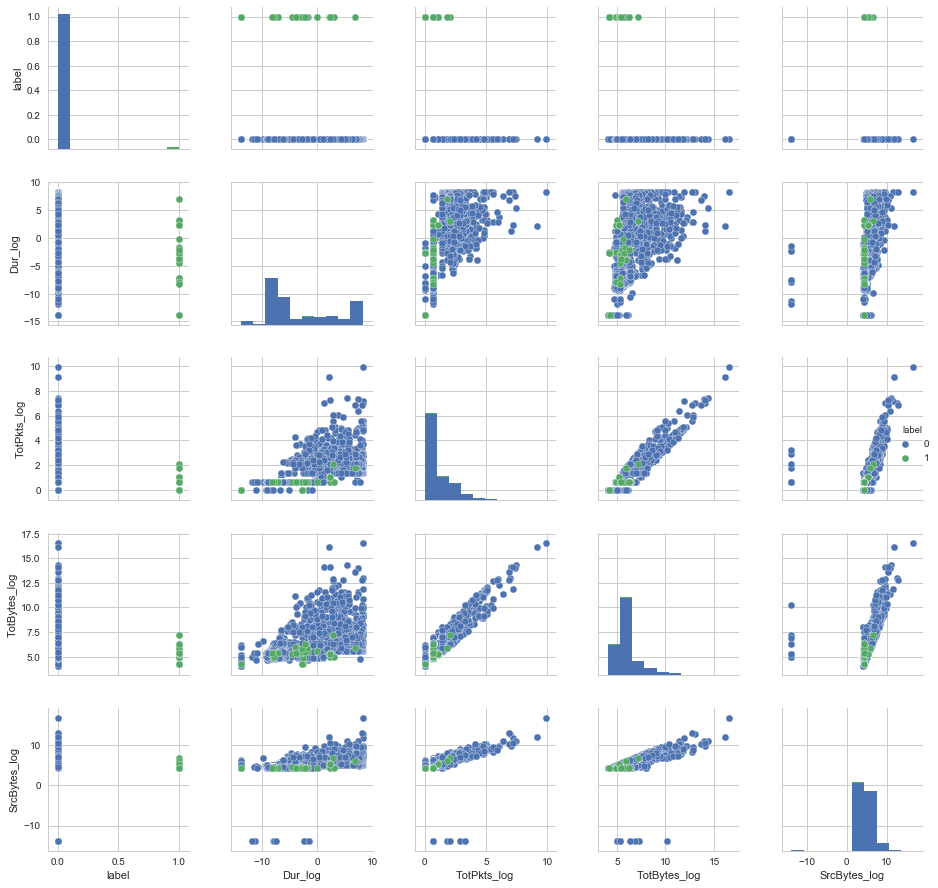

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

sns.pairplot(df_continue.iloc[(df_continue.index % 1000 == 0), 5:], hue="label", size=2.5)
plt.tight_layout()
plt.show()

In [9]:
df_continue.columns

Index(['StartTime', 'Dur', 'TotPkts', 'TotBytes', 'SrcBytes', 'label',
       'Dur_log', 'TotPkts_log', 'TotBytes_log', 'SrcBytes_log'],
      dtype='object')

In [10]:
X = df_continue.drop(
    ['StartTime', 'Dur', 'TotPkts', 'TotBytes', 'SrcBytes', 'label', 'TotPkts_log'], axis=1)
y = df_continue.label

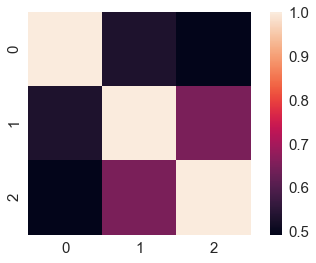

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
# Estimate the correlation matrix
P = np.dot(Z.T, Z) / df.shape[0]

sns.set(font_scale=1.5)
hm = sns.heatmap(P, cbar=True, square=True)

plt.tight_layout()
#plt.savefig('./output/fig-wine-corr.png', dpi=300)
plt.show()

sns.reset_orig()

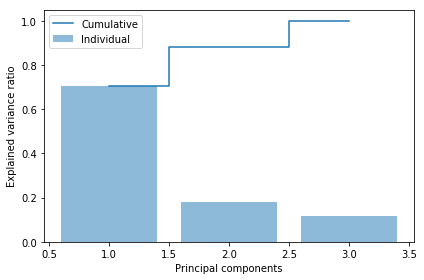

In [12]:
eigen_vals, eigen_vecs = np.linalg.eigh(P)

tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('./output/fig-pca-var-exp.png', dpi=300)
plt.show()

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
Z_pca = Z.dot(W)

df_continue_pca = pd.DataFrame(Z_pca, columns=["x1", "x2"])
df_continue_pca = pd.concat([df_continue[["label"]], df_continue_pca], axis=1)
df_continue_pca.columns = ["y", "x1", "x2"]
df_continue_pca["iteration"] = df_continue_pca.index % 1000
df_continue_pca.to_csv("df_continue_pca.csv", index=False)

In [14]:
table_ = df_continue_pca.describe()

print (table_)
print ("95% CI of x1 :", table_.iloc[1,1] - 2*table_.iloc[2,1], table_.iloc[1,1] + 2*table_.iloc[2,1])
print ("95% CI of x2 :", table_.iloc[1,2] - 2*table_.iloc[2,2], table_.iloc[1,2] + 2*table_.iloc[2,2])

                  y            x1            x2     iteration
count  2.824636e+06  2.824636e+06  2.824636e+06  2.824636e+06
mean   1.450134e-02 -1.339910e-14  2.021538e-14  4.994590e+02
std    1.195452e-01  1.455486e+00  7.308918e-01  2.886686e+02
min    0.000000e+00 -1.364366e+01 -7.114447e+00  0.000000e+00
25%    0.000000e+00 -9.118363e-01 -3.827420e-01  2.490000e+02
50%    0.000000e+00  5.778583e-01  2.602749e-01  4.990000e+02
75%    0.000000e+00  1.006733e+00  3.728706e-01  7.490000e+02
max    1.000000e+00  8.486254e+00  6.922896e+00  9.990000e+02
95% CI of x1 : -2.9109717406909845 2.910971740690958
95% CI of x2 : -1.461783540852433 1.4617835408524733


In [15]:
df_continue_pca_micro = df_continue_pca[(df_continue_pca.index % 1000 == 0)].reset_index(drop=True)

df_continue_pca_micro_train = df_continue_pca_micro[(df_continue_pca_micro.index % 5 != 0)]
df_continue_pca_micro_test = df_continue_pca_micro[(df_continue_pca_micro.index % 5 == 0)]

#df_continue_pca_micro.to_csv("df_continue_pca_micro.csv", index=False)
#df_continue_pca_micro_train.to_csv("df_continue_pca_micro_train.csv", index=False)
#df_continue_pca_micro_test.to_csv("df_continue_pca_micro_test.csv", index=False)

In [16]:
df_continue_pca_micro_test.y.value_counts()

0    557
1      8
Name: y, dtype: int64

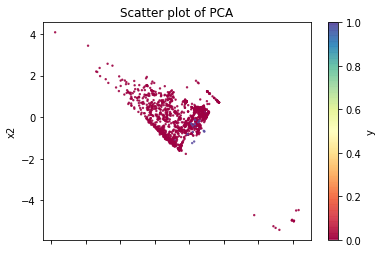

In [17]:
from matplotlib import cm

cmap = cm.get_cmap('Spectral')
df_continue_pca_micro.plot(
    x='x1', y='x2', title="Scatter plot of PCA", kind='scatter', s=2, c='y', cmap=cmap, alpha=0.8)
#plt.savefig('./output/1.png', dpi=300)
plt.show()

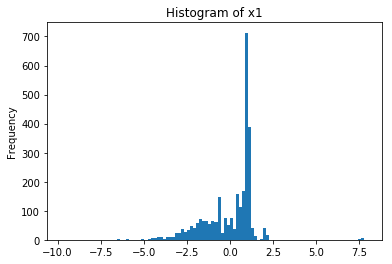

In [18]:
df_continue_pca_micro.x1.plot(kind="hist", title="Histogram of x1", bins=100, alpha=1)
#plt.savefig('./output/3.png', dpi=300)
plt.show()

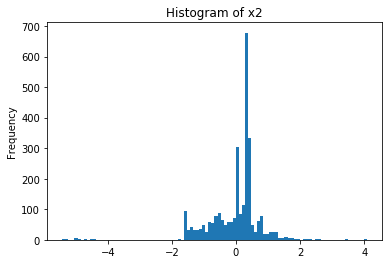

In [19]:
df_continue_pca_micro.x2.plot(kind="hist", title="Histogram of x2", bins=100, alpha=1)
#plt.savefig('./output/3.png', dpi=300)
plt.show()

In [22]:
df_ = df_continue_pca[(df_continue_pca.iteration == 0)].reset_index(drop=True)
df_[(df_.index.isin(np.arange(0, df_.shape[0], 5)))]

,y,x1,x2,iteration
0,0,-1.618331,-1.046883,0
5,0,-3.280761,0.187927,0
10,0,-2.176661,0.410811,0
15,0,-0.089759,0.270173,0
20,0,-1.847908,-0.028637,0
25,0,0.961666,0.288765,0
30,0,0.824118,0.413507,0
35,0,0.226061,-0.116999,0
40,0,0.992978,0.336666,0
45,0,-3.997538,1.228795,0
